<center><font size = 5>Preparation for Assessment - FA</font></center>

## CO1

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import folium
import seaborn as sns

In [2]:
# Importing DF
df_falcon9= pd.read_csv("../Data/Falcon9_part_1.csv")

In [3]:
# Exploring DF
df_falcon9.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,3/24/2006,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin1A,167.743129,9.047721,0
1,2,3/21/2007,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin2A,167.743129,9.047721,0
2,4,9/28/2008,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin2C,167.743129,9.047721,0
3,5,7/13/2009,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin3C,167.743129,9.047721,0
4,6,6/4/2010,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
5,8,5/22/2012,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
6,10,3/1/2013,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
7,11,9/29/2013,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
8,12,12/3/2013,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
9,13,1/6/2014,Falcon 9,3325.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0


In [4]:
# Slicing only records with Falcon 9
df_original_falcon9=df_falcon9[df_falcon9['BoosterVersion']=='Falcon 9']

In [5]:
# Making it a CSV
df_original_falcon9.to_csv('../Data/falcon_df.csv')

### A. Read the csv file and parse the Date variable to include 'day', 'month', and 'year' in the dataframe falcon_df.

In [9]:
# Reading the csv file and parse the Date variable to include 'day', 'month', and 'year' in the dataframe falcon_df.
falcon_df=pd.read_csv('../Data/falcon_df.csv',parse_dates=True)

In [10]:
# COnverting news columns for date month year
falcon_df['year'] = pd.DatetimeIndex(falcon_df['Date']).year.astype('str')
falcon_df['month'] = pd.DatetimeIndex(falcon_df['Date']).month.astype('str')
falcon_df['Day'] = pd.DatetimeIndex(falcon_df['Date']).day.astype('str')

In [13]:
# Now again exploring the df
falcon_df.head(5)

,Unnamed: 0,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,...,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,year,month,Day
0,4,6,6/4/2010,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,...,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010,6,4
1,5,8,5/22/2012,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,...,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012,5,22
2,6,10,3/1/2013,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,...,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013,3,1
3,7,11,9/29/2013,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,...,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013,9,29
4,8,12,12/3/2013,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,...,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013,12,3


### B. Visualise the successful launch of Falcon9 SpaceX vehicles using the open street map by adding appropriate markers to make 'LaunchSite' as tool tip, and 'year' to popup to map.

In [9]:
# Visualizing Falcon - 9 launch places
kol = folium.Map(location=[falcon_df['Latitude'][0], falcon_df['Longitude'][0]], tiles="openstreetmap", zoom_start=4)
for i in range(falcon_df.shape[0]):
  folium.Marker(location=[falcon_df['Latitude'][i], falcon_df['Longitude'][i]],popup=falcon_df.loc[i]['year'],tooltip=falcon_df['year'][i]).add_to(kol)
kol

In [10]:
# Compute the success rate of each orbit type using the dataframe 'falcon_df'. Choose an appropriate plot to report your observation by visually checking if there are any relationships between success rate and orbit type.
falcon_df.head(5)

,Unnamed: 0,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,...,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,year,month,Day
0,4,6,6/4/2010,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,...,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010,6,4
1,5,8,5/22/2012,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,...,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012,5,22
2,6,10,3/1/2013,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,...,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013,3,1
3,7,11,9/29/2013,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,...,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013,9,29
4,8,12,12/3/2013,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,...,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013,12,3


### C. Compute the success rate of each orbit type using the dataframe 'falcon_df'. Choose an appropriate plot to report your observation by visually checking if there are any relationships between success rate and orbit type


In [11]:
df_succesrate=falcon_df.groupby('Orbit').agg({'Class':'mean'})

In [12]:
df_succesrate

,Class
Orbit,
ES-L1,1.000000
GEO,1.000000
GTO,0.518519
HEO,1.000000
ISS,0.619048
LEO,0.714286
MEO,0.666667
PO,0.666667
SO,0.000000


<AxesSubplot:ylabel='Orbit'>

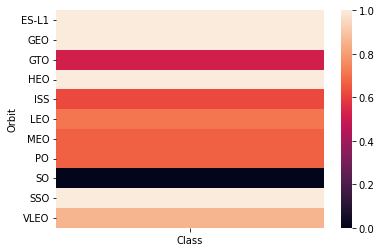

In [13]:
sns.heatmap(df_succesrate)

## CO2

Inspect the variables in 'Falcon_part_2.csv' to report linear correlation of variables. Write your observation on statistical association based on rank of the variables. Comment on parametric and non-parametric methods that you have used to report the statistics. Also, justify the significance of each method used in this analysis based on sample size.

In [14]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(falcon_df)
print(categorical_features)

['Date', 'BoosterVersion', 'Orbit', 'LaunchSite', 'Outcome', 'LandingPad', 'Serial', 'year', 'month', 'Day']


C:\Users\klmsa\anaconda3\lib\site-packages\dython\nominal.py:137: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False
  warnings.warn(
C:\Users\klmsa\anaconda3\lib\site-packages\dython\nominal.py:269: RuntimeWarning: Rounded eta = 1.0000000000000004 to 1. This is probably due to floating point precision issues.
  warnings.warn(f'Rounded eta = {eta} to 1. This is probably due to floating point precision issues.',


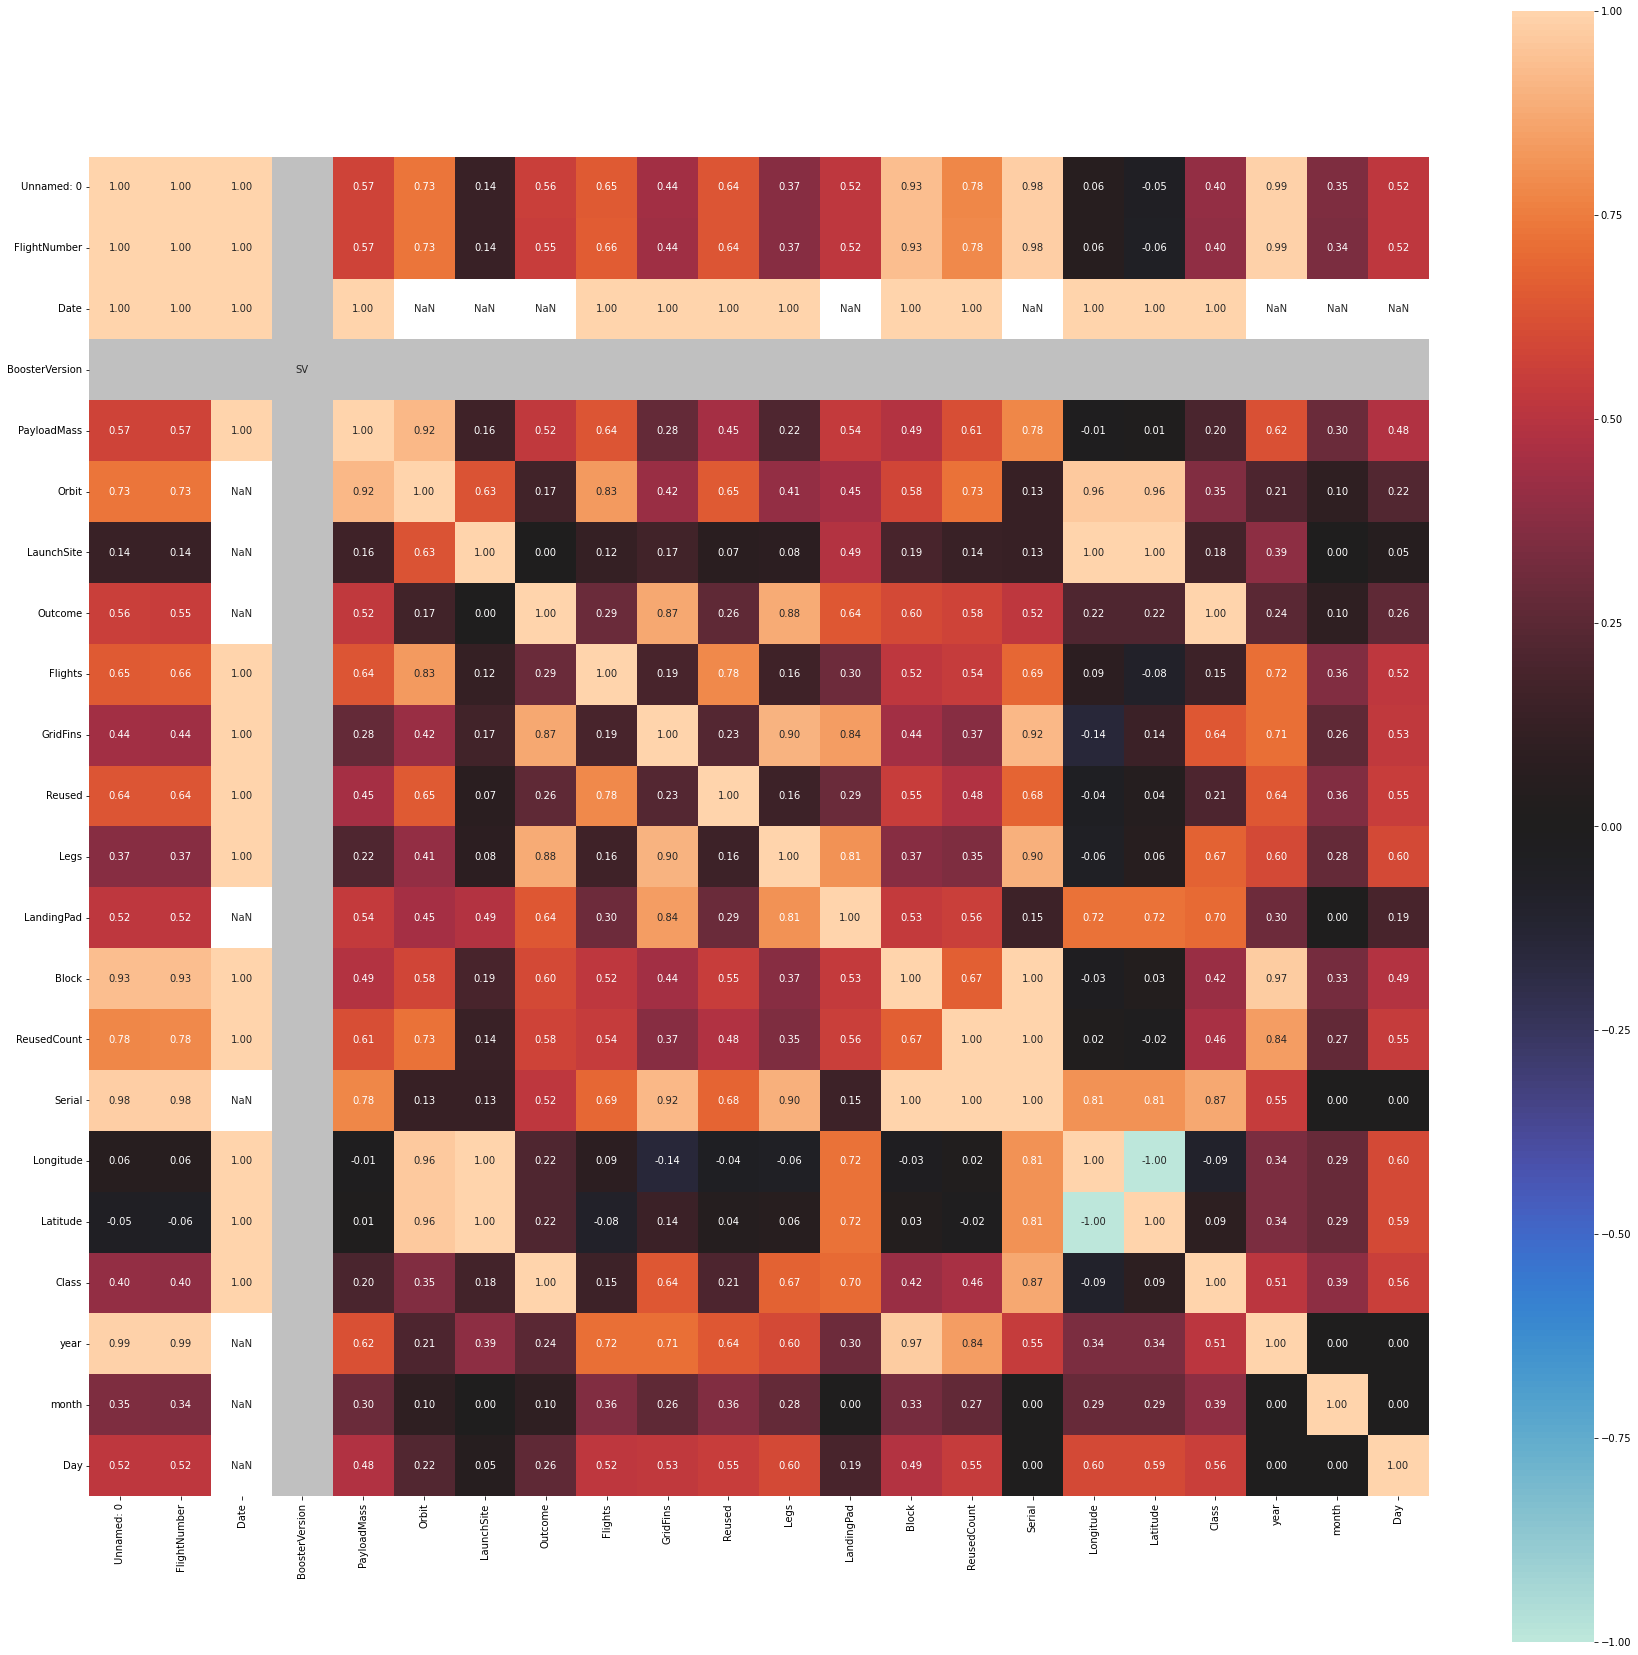

In [15]:
from dython.nominal import associations
falcon_cor=associations(falcon_df, filename= 'complete_correlation.png', figsize=(30,30))

In [16]:
falcon_cor_df=falcon_cor['corr']
falcon_cor_df.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

<ipython-input-16-820c1d6451e7>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  falcon_cor_df.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,Unnamed: 0,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,year,month,Day
Unnamed: 0,1.00,1.00,1.00,0.00,0.57,0.73,0.14,0.56,0.65,0.44,0.64,0.37,0.52,0.93,0.78,0.98,0.06,-0.05,0.40,0.99,0.35,0.52
FlightNumber,1.00,1.00,1.00,0.00,0.57,0.73,0.14,0.55,0.66,0.44,0.64,0.37,0.52,0.93,0.78,0.98,0.06,-0.06,0.40,0.99,0.34,0.52
Date,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00
BoosterVersion,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PayloadMass,0.57,0.57,1.00,0.00,1.00,0.92,0.16,0.52,0.64,0.28,0.45,0.22,0.54,0.49,0.61,0.78,-0.01,0.01,0.20,0.62,0.30,0.48
Orbit,0.73,0.73,0.00,0.00,0.92,1.00,0.63,0.17,0.83,0.42,0.65,0.41,0.45,0.58,0.73,0.13,0.96,0.96,0.35,0.21,0.10,0.22
LaunchSite,0.14,0.14,0.00,0.00,0.16,0.63,1.00,0.00,0.12,0.17,0.07,0.08,0.49,0.19,0.14,0.13,1.00,1.00,0.18,0.39,0.00,0.05
Outcome,0.56,0.55,0.00,0.00,0.52,0.17,0.00,1.00,0.29,0.87,0.26,0.88,0.64,0.60,0.58,0.52,0.22,0.22,1.00,0.24,0.10,0.26
Flights,0.65,0.66,1.00,0.00,0.64,0.83,0.12,0.29,1.00,0.19,0.78,0.16,0.30,0.52,0.54,0.69,0.09,-0.08,0.15,0.72,0.36,0.52
GridFins,0.44,0.44,1.00,0.00,0.28,0.42,0.17,0.87,0.19,1.00,0.23,0.90,0.84,0.44,0.37,0.92,-0.14,0.14,0.64,0.71,0.26,0.53


## CO3
Create a database SpaceX.db in sqlite using the csv files in data folder. Create a new dataset 'Falcon_launch.csv’ by retrieving 'Orbit' and 'LaunchSite'. Also, report your observation on shape of the dataset.


In [17]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm #to check progress bar
import numpy as np

In [18]:
con = sql.connect("SpaceX.db")
cur = con.cursor()

In [19]:
"../Data/Falcon9_part_1.csv".split("/")[-1].split('.')[0]

'Falcon9_part_1'

In [20]:
full_path_list='../Data/Falcon9_part_1.csv'
pd.read_csv(full_path_list).to_sql(full_path_list.split("/")[-1].split('.')[0], con, if_exists='append', index=False)

In [21]:
df = pd.read_sql('SELECT * FROM Falcon9_part_1', con)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,3/24/2006,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,0,0,0,None,NaN,0,Merlin1A,167.743129,9.047721,0
1,2,3/21/2007,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,0,0,0,None,NaN,0,Merlin2A,167.743129,9.047721,0
2,4,9/28/2008,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,0,0,0,None,NaN,0,Merlin2C,167.743129,9.047721,0
3,5,7/13/2009,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,0,0,0,None,NaN,0,Merlin3C,167.743129,9.047721,0
4,6,6/4/2010,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,0,0,0,None,1.0,0,B0003,-80.577366,28.561857,0


In [22]:
Falcon_launch=df[['Orbit','LaunchSite']].to_csv('Falcon_launch.csv')

In [23]:
df_falcon_launch=pd.read_csv('./Falcon_launch.csv')

In [24]:
print("the shape of teh dataset is :",df_falcon_launch.drop(['Unnamed: 0'],axis=1).shape)

the shape of teh dataset is : (376, 2)


## CO4
### Choose appropriate plots to report your observation on the following tasks

### 1. Yearly trend on successful launch of Falcon 9.

In [25]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

In [26]:
Extract_year(df_falcon9["Date"])
zipped = zip(df_falcon9['Date'], df_falcon9['Orbit'], df_falcon9['Outcome'],df_falcon9['Class'], year,df['LaunchSite'])
df1=pd.DataFrame(zipped, columns=['Date', 'Orbit', 'Outcome', 'Class', 'Year',"LaunchSite"])
df1

,Date,Orbit,Outcome,Class,Year,LaunchSite
0,3/24/2006,LEO,None None,0,3/24/2006,Kwajalein Atoll
1,3/21/2007,LEO,None None,0,3/21/2007,Kwajalein Atoll
2,9/28/2008,LEO,None None,0,9/28/2008,Kwajalein Atoll
3,7/13/2009,LEO,None None,0,7/13/2009,Kwajalein Atoll
4,6/4/2010,LEO,None None,0,6/4/2010,CCSFS SLC 40
...,...,...,...,...,...,...
89,9/3/2020,VLEO,True ASDS,1,9/3/2020,KSC LC 39A
90,10/6/2020,VLEO,True ASDS,1,10/6/2020,KSC LC 39A
91,10/18/2020,VLEO,True ASDS,1,10/18/2020,KSC LC 39A
92,10/24/2020,VLEO,True ASDS,1,10/24/2020,CCSFS SLC 40


<AxesSubplot:xlabel='Date'>

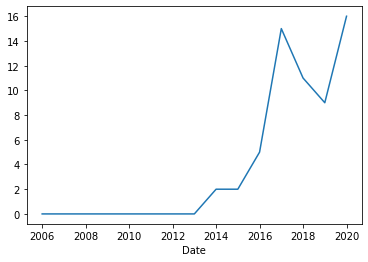

In [27]:
df1.groupby(pd.to_datetime(df1["Date"]).dt.year)["Class"].sum().plot()

### 2. Yearly trend on sites where Falcon(s) are launched.

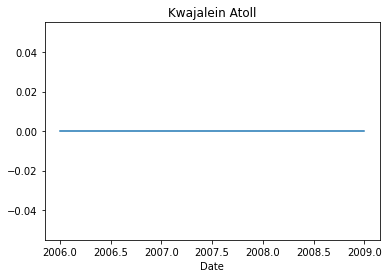

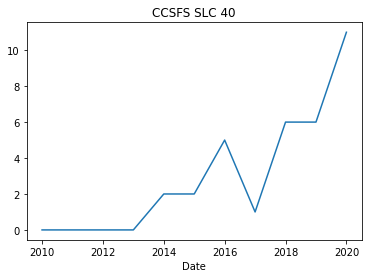

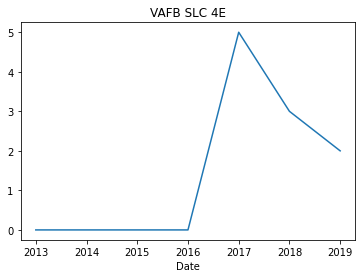

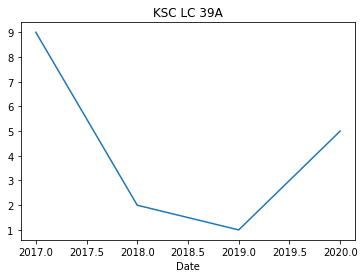

In [28]:
for i in df1["LaunchSite"].unique():
    dfsub = df1[df1["LaunchSite"]==i]
    dfsub.groupby(pd.to_datetime(dfsub["Date"]).dt.year)["Class"].sum().plot()
    plt.title(i)
    plt.show()
    print()